In [1]:
# Package Load
from google.colab import drive
drive.mount('/content/Mydrive')
%cd "/content/Mydrive/MyDrive/IOT_hackathon/Github/IOT_hackathon"

!pip install geopandas

import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Mounted at /content/Mydrive
/content/Mydrive/MyDrive/IOT_hackathon/Github/IOT_hackathon
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.8 MB/s 
     |████████████████████████████████| 6.3 MB 40.6 MB/s 
     |████████████████████████████████| 16.7 MB 451 kB/s 


In [4]:
# 서울의 전체 행정동에 대한 Polygon data
seoul_area = gpd.GeoDataFrame.from_file('Preprocessing/data/LSMD_ADM_SECT_UMD_11.shp', encoding='cp949')
seoul_area.head()

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11290129,보문동7가,7,11290,5222,"POLYGON ((957864.444 1953662.735, 957878.870 1..."
1,11290103,돈암동,8,11290,5223,"POLYGON ((956352.458 1955412.808, 956340.774 1..."
2,11290139,석관동,9,11290,5224,"POLYGON ((961229.416 1956099.120, 961229.075 1..."
3,11290114,삼선동4가,22,11290,5225,"POLYGON ((957329.114 1954659.435, 957325.653 1..."
4,11290117,동선동2가,29,11290,5232,"POLYGON ((957516.003 1954475.929, 957510.279 1..."


(933183.63288061, 973919.1856209108, 1935149.4394814787, 1968503.2032276713)

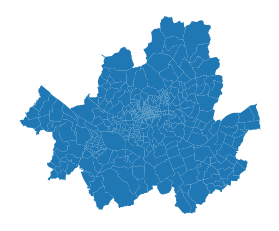

In [ ]:
seoul_area.plot()
plt.axis('off')

In [ ]:
seoul_area.crs # Coordinate Sys - EPSG : 5179

<Derived Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# 서울 전역 대상 격자 생성

xmin, ymin, xmax, ymax = seoul_area.total_bounds # Total bound : 최대지점

length = 1000 # 가로/세로 500m 격자
wide = 1000

cols = list(np.arange(xmin, xmax + wide, wide))
rows = list(np.arange(ymin, ymax + length, length))

polygons = []
for x in cols[:-1]:
    for y in rows[:-1]:
        polygon_i = Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)])
        if seoul_area.geometry.intersects(polygon_i).any(): # Intersect(교차) 여부 파악
            polygons.append(polygon_i)
        else:
            pass

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid_whole.shp")

print(f"격자 개수 : {len(grid)}")

격자 개수 : 701


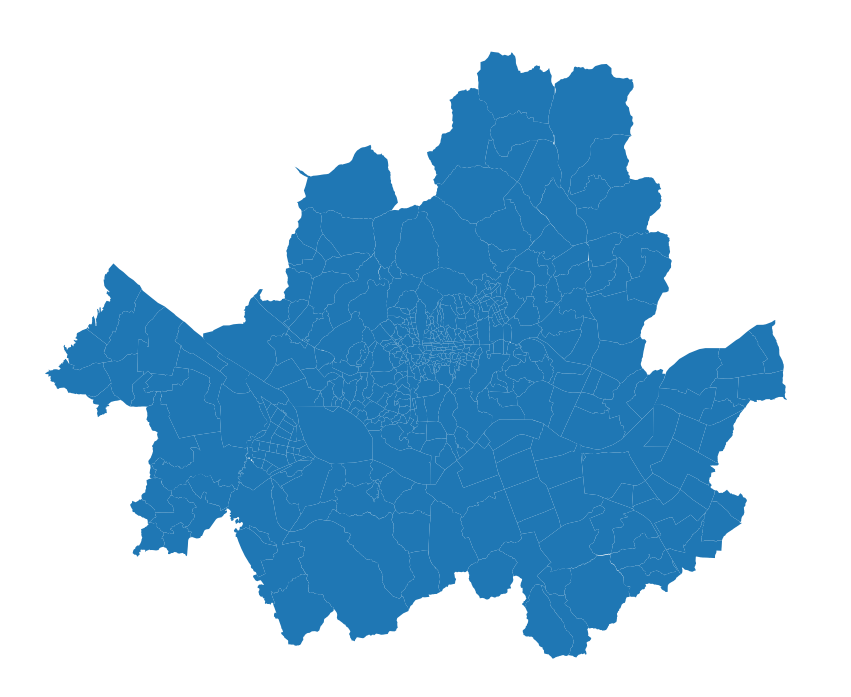

In [ ]:
# Plot

fig, ax = plt.subplots(figsize = (15,15))
seoul_area.plot(ax=ax, zorder=1)
grid.plot(ax=ax,facecolor = 'none', zorder = 2) # high zorder > expressed at front layer
plt.axis('off')
plt.show()

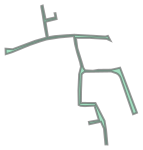

In [5]:
# 개별 도로 확인
seoul_road = gpd.GeoDataFrame.from_file('Preprocessing/data/Z_KAIS_TL_SPRD_RW_11000.shp', encoding = 'cp949')
seoul_road = seoul_road.to_crs(epsg=5179)
seoul_road.geometry[0]

In [6]:
# 도로기준 격자 생성
'''
한강이나 남산 등 격자 내에 도로가 존재하지 않는 지역은 제외하여
새로운 grid data 생성
서울시의 전체 도로명주소가 부여된 도로들에 대해 intersect 여부로 격자 추가하는 알고리즘
'''

xmin, ymin, xmax, ymax = seoul_area.total_bounds # Total bound : 최대지점

length = 500 # 가로/세로 500m 격자
wide = 500

cols = list(np.arange(xmin, xmax + wide, wide))
rows = list(np.arange(ymin, ymax + length, length))

polygons = []
for x in tqdm(cols[:-1]):
    for y in rows[:-1]:
        polygon_i = Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)])
        if seoul_road.geometry.intersects(polygon_i).any(): # Intersect(교차) 여부 파악
            polygons.append(polygon_i)
        else:
            pass

grid = gpd.GeoDataFrame({'geometry':polygons})

  4%|▍         | 3/75 [00:33<13:26, 11.20s/it]


KeyboardInterrupt: ignored

In [ ]:
grid.to_file("Seoul_Grid/grid.shp")

print(f"격자 개수 : {len(grid)}")

In [ ]:
seoul_road = seoul_road.to_crs(epsg=5179)

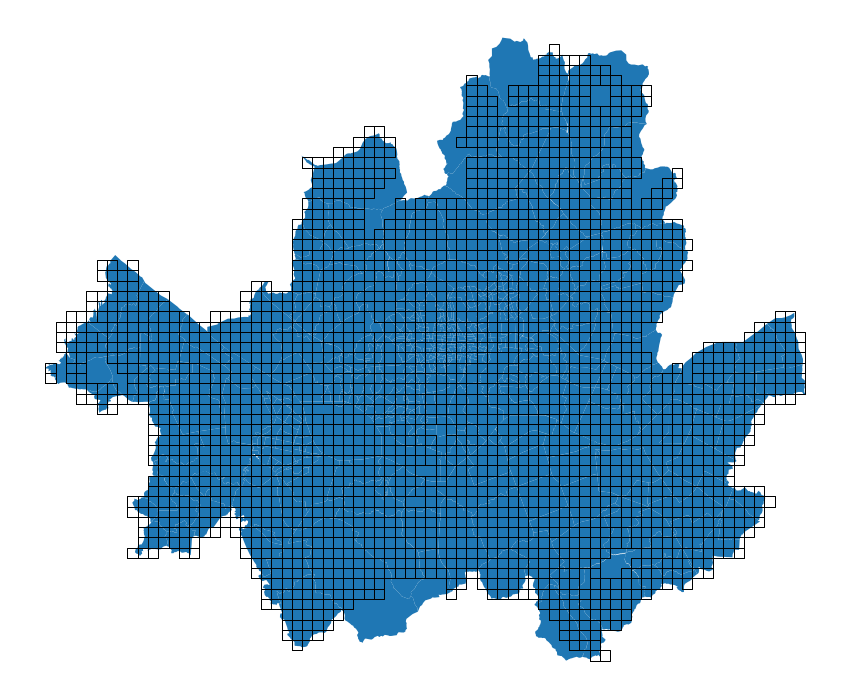

In [ ]:
# Plot
grid = gpd.GeoDataFrame.from_file('grid.shp')

fig, ax = plt.subplots(figsize = (15,15))
seoul_area.plot(ax=ax, zorder=1)
grid.plot(ax=ax,facecolor = 'none', zorder = 2) # high zorder > expressed at front layer
plt.axis('off')
plt.show()